# Residual Histogram
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [1]:
!../data/getlogs.sh
!ls ../data

getlogs.sh  metric.csv	safirortb.log


In [2]:
import numpy as np
import os
from stats_util import Type, get_serie

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812102e+13, 1.91000000e+02, 9.10000000e+01, ...,
        8.97000000e-02, 6.00000000e+00, 2.42000000e+02],
       [2.01812102e+13, 2.00000000e+02, 1.13000000e+02, ...,
        1.12100000e-01, 8.00000000e+00, 2.44000000e+02],
       [2.01812102e+13, 1.91000000e+02, 9.50000000e+01, ...,
        7.45000000e-02, 6.00000000e+00, 2.77000000e+02],
       ...,
       [2.01812102e+13, 2.81000000e+02, 1.27000000e+02, ...,
        1.43300000e-01, 2.00000000e+00, 2.24000000e+02],
       [2.01812102e+13, 2.86000000e+02, 1.39000000e+02, ...,
        5.34000000e-02, 1.00000000e+00, 2.71000000e+02],
       [2.01812102e+13, 2.46000000e+02, 8.60000000e+01, ...,
        7.43000000e-02, 3.00000000e+00, 2.47000000e+02]])

In [8]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
fn = get_serie(dataset, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

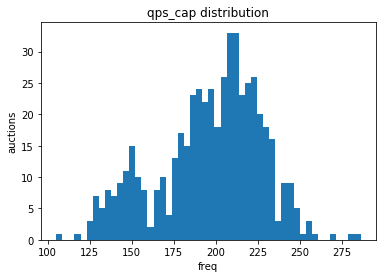

In [9]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');

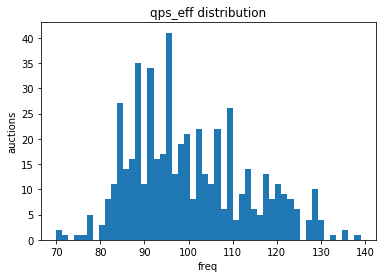

In [11]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');

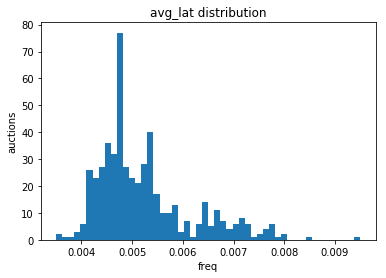

In [12]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');

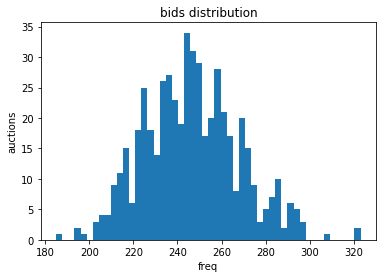

In [13]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('auctions');


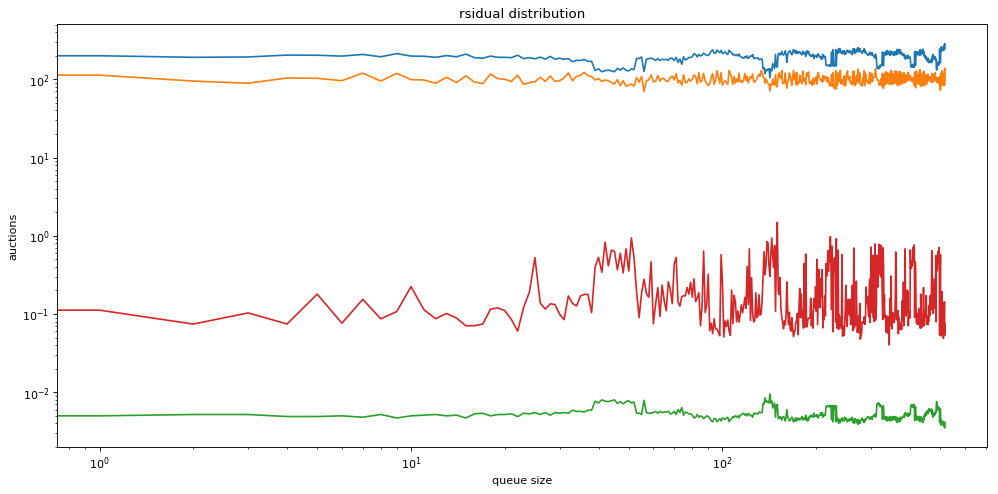

In [15]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1:5])
#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');